In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def erstelle_balkendiagramm(datei_pfad, output_pfad1, output_pfad2, sheet_name=None):
    # Lade die Daten aus der Excel-Datei
    xls = pd.ExcelFile(datei_pfad)
    
    # Wenn kein Sheet-Name angegeben ist, verwende das erste Sheet
    if sheet_name is None:
        sheet_name = xls.sheet_names[0]
    
    # Lese die Daten des angegebenen Sheets
    df = pd.read_excel(datei_pfad, sheet_name=sheet_name, skiprows=1)
    
    # Finde die Trennzeile (erste Zeile, die nur NaN-Werte enthält)
    split_index = df[df.isnull().all(axis=1)].index[0]
    
    # Teile den DataFrame in zwei Teile
    df1 = df.iloc[:split_index].dropna(how='all')
    df2 = df.iloc[split_index+1:].dropna(how='all')
    
    # Setze die erste Spalte als Index für beide DataFrames
    df1.set_index(df1.columns[0], inplace=True)
    df2.set_index(df2.columns[0], inplace=True)
    
    # Konvertiere die Spalten in numerische Werte, setze Fehler auf NaN und entferne diese
    df1 = df1.apply(pd.to_numeric, errors='coerce').dropna()
    df2 = df2.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Erstelle das erste Balkendiagramm
    ax1 = df1.plot(kind='bar', figsize=(10, 6), legend=False)
    ax1.set_title('Rendite der Portfolios für das Jahr 2019')
    ax1.set_xlabel('Portfoliobeschreibung')
    ax1.set_ylabel('Aktienrendite in %')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(output_pfad1)
    plt.show()
    
    # Erstelle das zweite Balkendiagramm
    ax2 = df2.plot(kind='bar', figsize=(10, 6), legend=False)
    ax2.set_title('Rendite der Portfolios für die Periode Januar bis April 2024')
    ax2.set_xlabel('Portfoliobeschreibung')
    ax2.set_ylabel('Aktienrendite in %')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(output_pfad2)
    plt.show()

In [29]:
if __name__ == "__main__":
    datei_pfad = 'Standarbabweichung_Genauigkeit.xlsx'  # Pfad zur hochgeladenen Excel-Datei
    output_pfad1 = 'Standarbabweichung_Genauigkeit.png'  # Pfad zur ersten Ausgabe-PNG-Datei
    output_pfad2 = 'Standarbabweichung_Genauigkeit.png'  # Pfad zur zweiten Ausgabe-PNG-Datei
    sheet_name = None  # Setze den Namen des Sheets, wenn es mehr als ein Sheet gibt
    erstelle_balkendiagramm(datei_pfad, output_pfad1, output_pfad2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def erstelle_balkendiagramm2(datei_pfad, output_pfad, sheet_name=None):
    # Lade die Daten aus der Excel-Datei
    xls = pd.ExcelFile(datei_pfad)
    
    # Wenn kein Sheet-Name angegeben ist, verwende das erste Sheet
    if sheet_name is None:
        sheet_name = xls.sheet_names[0]
    
    # Lese die Daten des angegebenen Sheets
    df = pd.read_excel(datei_pfad, sheet_name=sheet_name)
    
    # Suche nach der Tabelle "Vergleich der Standardabweichungen pro Aktie"
    start_index = df[df.iloc[:, 0] == "Vergleich der Standardabweichungen pro Aktie"].index[0]
    
    # Extrahiere die Tabelle
    table_df = df.iloc[start_index+1:].dropna(how='all')
    table_df.columns = table_df.iloc[0]
    table_df = table_df[1:]
    
    # Setze die erste Spalte als Index
    table_df.set_index(table_df.columns[0], inplace=True)
    
    # Konvertiere die Spalten in numerische Werte, setze Fehler auf NaN und entferne diese
    table_df = table_df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Erstelle das Balkendiagramm
    ax = table_df.plot(kind='bar', figsize=(10, 6), legend=True)
    
    # Setze den Titel und die Beschriftungen
    ax.set_title('Vergleich der Standardabweichungen pro Aktie')
    ax.set_xlabel('Vorhersagemodell')
    ax.set_ylabel('Standardabweichung')
    
    # Verwende den Index als x-Achsenbeschriftungen
    ax.set_xticklabels(table_df.index, rotation=45, ha='right')
    
    # Speichere das Diagramm als PNG
    plt.tight_layout()
    plt.savefig(output_pfad)
    plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

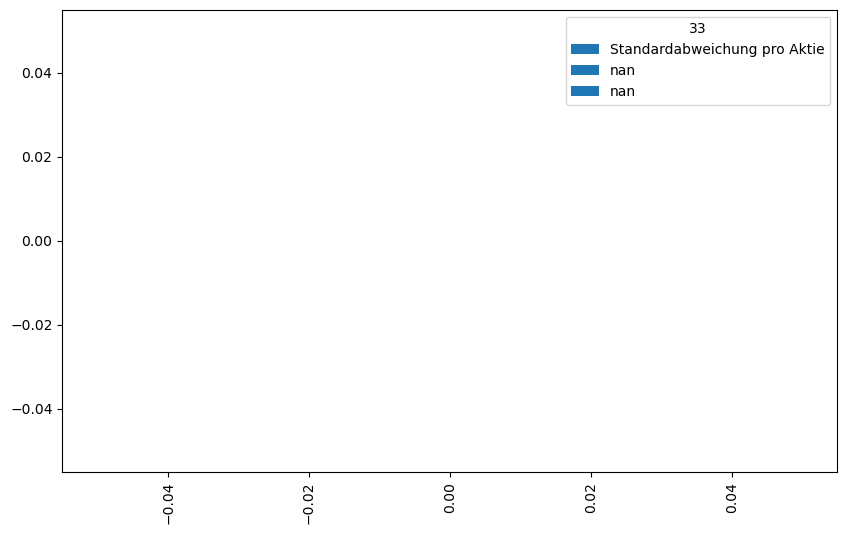

In [27]:
if __name__ == "__main__":
    datei_pfad = 'Vorhersagegenauigkeit.xlsx'  # Pfad zur hochgeladenen Excel-Datei
    output_pfad = 'standardabweichungen_balkendiagramm.png'  # Pfad zur Ausgabe-PNG-Datei
    sheet_name = None  # Setze den Namen des Sheets, wenn es mehr als ein Sheet gibt
    erstelle_balkendiagramm2(datei_pfad, output_pfad)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def erstelle_balkendiagramm(datei_pfad, output_pfad, sheet_name=None):
    # Lade die Daten aus der Excel-Datei
    xls = pd.ExcelFile(datei_pfad)
    
    # Wenn kein Sheet-Name angegeben ist, verwende das erste Sheet
    if sheet_name is None:
        sheet_name = xls.sheet_names[0]
    
    # Lese die Daten des angegebenen Sheets und überspringe die erste Zeile
    df = pd.read_excel(datei_pfad, sheet_name=sheet_name, skiprows=0)
    
    # Setze die erste Spalte als Index
    df.set_index(df.columns[0], inplace=True)
    
    # Konvertiere die Spalten in numerische Werte, setze Fehler auf NaN und entferne diese
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Erstelle das Balkendiagramm
    ax = df.plot(kind='bar', figsize=(10, 6), legend=False)
    
    # Setze den Titel und die Beschriftungen
    ax.set_title('Standardabweichung der Modelle')
    ax.set_xlabel('Portfoliobeschreibung')
    ax.set_ylabel('Standardabweichung')
    
    # Dreh die x-Achsenbeschriftungen für bessere Lesbarkeit
    plt.xticks(rotation=45, ha='right')
    
    # Speichere das Diagramm als PNG
    plt.tight_layout()
    plt.savefig(output_pfad)
    plt.show()




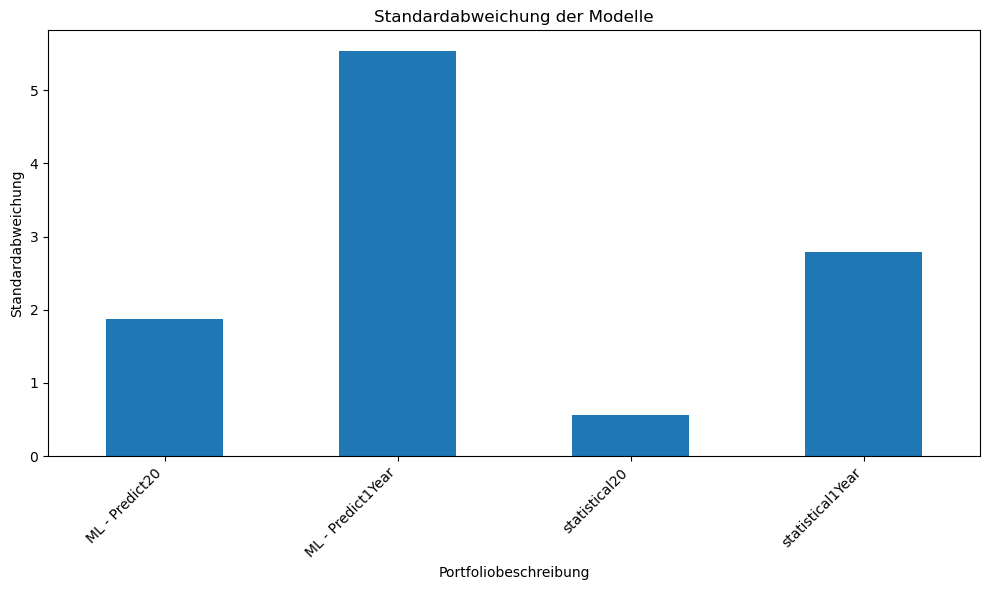

In [2]:
if __name__ == "__main__":
    datei_pfad = 'Standarbabweichung_Genauigkeit.xlsx'  # Pfad zur hochgeladenen Excel-Datei
    output_pfad = 'Standardabweichung.png'  # Pfad zur Ausgabe-PNG-Datei
    sheet_name = None  # Setze den Namen des Sheets, wenn es mehr als ein Sheet gibt
    erstelle_balkendiagramm(datei_pfad, output_pfad)